In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import python.building_elec_model as bem

from python.utils import project_path, zone_names, tgw_path

## ComStock model

### Train and predict future ComStock loads: state-wide

In [2]:
stock_type = 'comstock'

In [3]:
# Get the specific upgrades we are interested in
df_crosswalk = pd.read_csv('../../data/nrel/comstock/measure_name_crosswalk.csv')
upgrades = df_crosswalk[df_crosswalk['measure_id'].isin(['pkg_0001', 'pkg_0002', 'pkg_0003', 'hvac_0003'])]
upgrades = upgrades['2024_comstock_amy2018_release_1_upgrade_id'].to_numpy()

In [4]:
# Read ResStock and temperature data
temp_file_path = f"{project_path}/data/climate/tgw/zonal_T2C_historical_1980_2019.csv"

df = bem.read_and_prepare_data(temp_file_path = temp_file_path,
                               stock_type = stock_type,
                               upgrades = upgrades, 
                               building_types = bem.building_types_dict[stock_type])

In [5]:
df_crosswalk[df_crosswalk['measure_id'].isin(['pkg_0001', 'pkg_0002', 'pkg_0003', 'hvac_0003'])]

measure_id                         measure_documentation_name  \
7   hvac_0003                    DOAS with Mini Split Heat Pumps   
25   pkg_0001  Package 1 - Wall and Roof Insulation and New W...   
26   pkg_0002   Package 2 - LED Lighting, HP-RTU and ASHP-Boiler   
27   pkg_0003  Package 3 - Wall and Roof Insulation, New Wind...   

                      public_repo_measure_folder_name  \
7                          upgrade_doas_hp_minisplits   
25  upgrade_env_exterior_wall_insulation; upgrade_...   
26  upgrade_hvac_add_heat_pump_rtu; upgrade_hvac_r...   
27  upgrade_env_exterior_wall_insulation; upgrade_...   

    2024_comstock_amy2018_release_1_upgrade_id  \
7                                            7   
25                                          28   
26                                          29   
27                                          31   

         2024_comstock_amy2018_release_1_upgrade_name  \
7                                  DOAS HP Minisplits   
25    Package 1, Wall & Roof Insulation + New Windows   
26  Package 2, LED Lighting + Variable Speed HP RT...   
27                   Package 4, Package 1 + Package 2   

    2023_comstock_amy2018_release_2_upgrade_id  \
7                                          4.0   
25                                        16.0   
26                                        17.0   
27                                        18.0   

   2023_comstock_amy2018_release_2_upgrade_name  \
7                            DOAS HP Minisplits   
25                                    Package 1   
26                                    Package 2   
27                                    Package 3   

    2023_comstock_amy2018_release_1_upgrade_id  \
7                                          2.0   
25                                         NaN   
26                                         NaN   
27                                         NaN   

   2023_comstock_amy2018_release_1_upgrade_name  
7                            DOAS HP Minisplits  
25                                          NaN  
26                                          NaN  
27                                          NaN

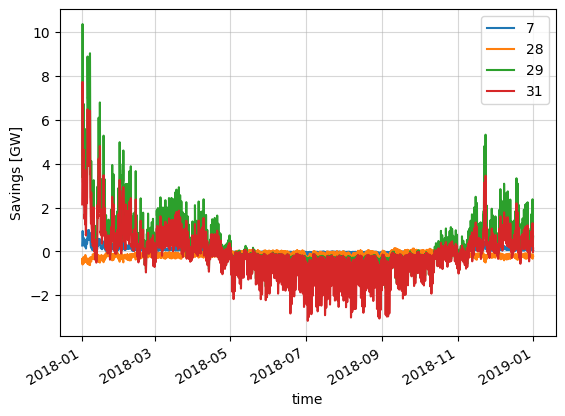

In [6]:
fig, ax = plt.subplots()
for upgrade in upgrades:
    (df[df['upgrade'] == upgrade].groupby(['time'])['savings_MW'].sum()/1000).plot(ax=ax, label=upgrade)
ax.set_ylabel('Savings [GW]')
ax.legend()
ax.grid(alpha=0.5)
plt.show()

Training 28 models with MLPRegressor...
Network architecture: (100, 100)
Regularization (alpha): 0.001
Max iterations: 500
------------------------------------------------------------

Progress: 1/28
Training model for upgrade 29, building_type outpatient (8753 samples)
Model trained - R2: 0.871, RMSE: 9.49 MW, Iterations: 66


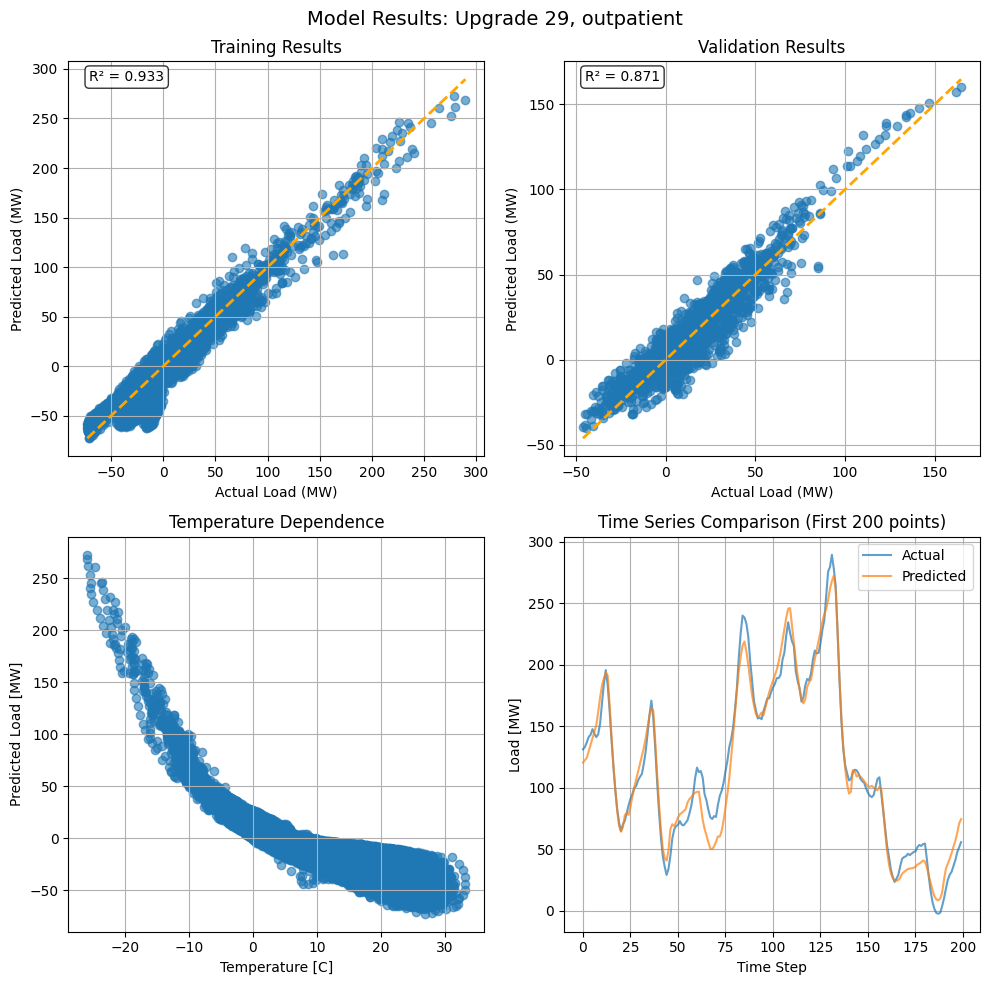


Progress: 2/28
Training model for upgrade 29, building_type hospital (8753 samples)
Model trained - R2: 0.889, RMSE: 9.04 MW, Iterations: 99


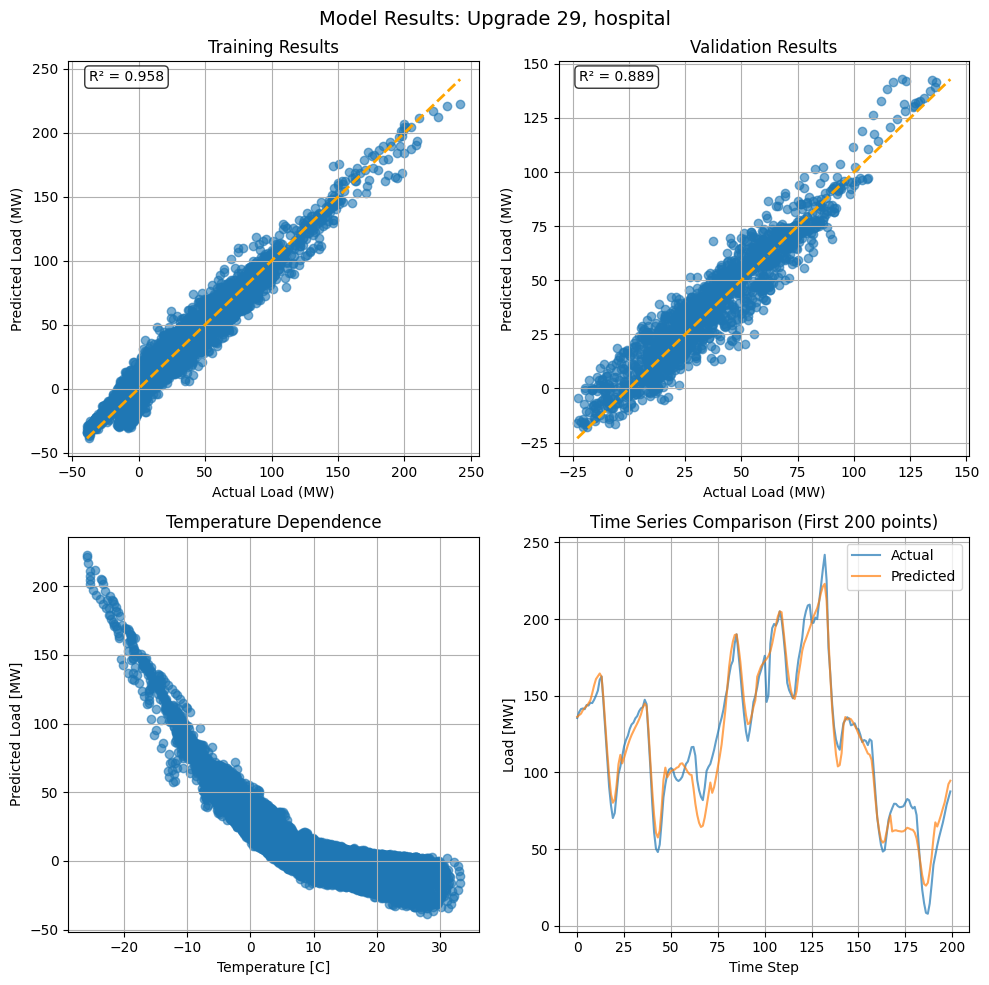


Progress: 3/28
Training model for upgrade 29, building_type largeoffice (8753 samples)
Model trained - R2: 0.509, RMSE: 53.64 MW, Iterations: 140


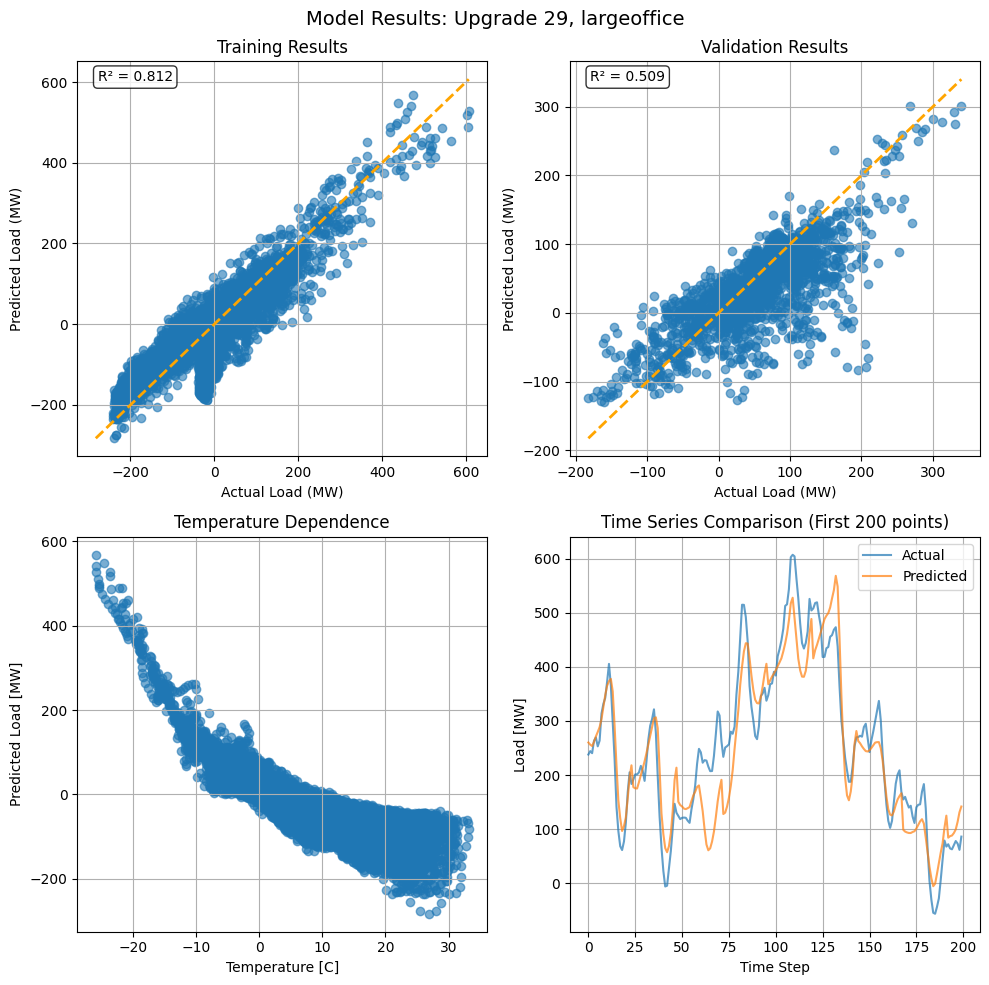


Progress: 4/28
Training model for upgrade 29, building_type largehotel (8753 samples)
Model trained - R2: 0.723, RMSE: 14.75 MW, Iterations: 98


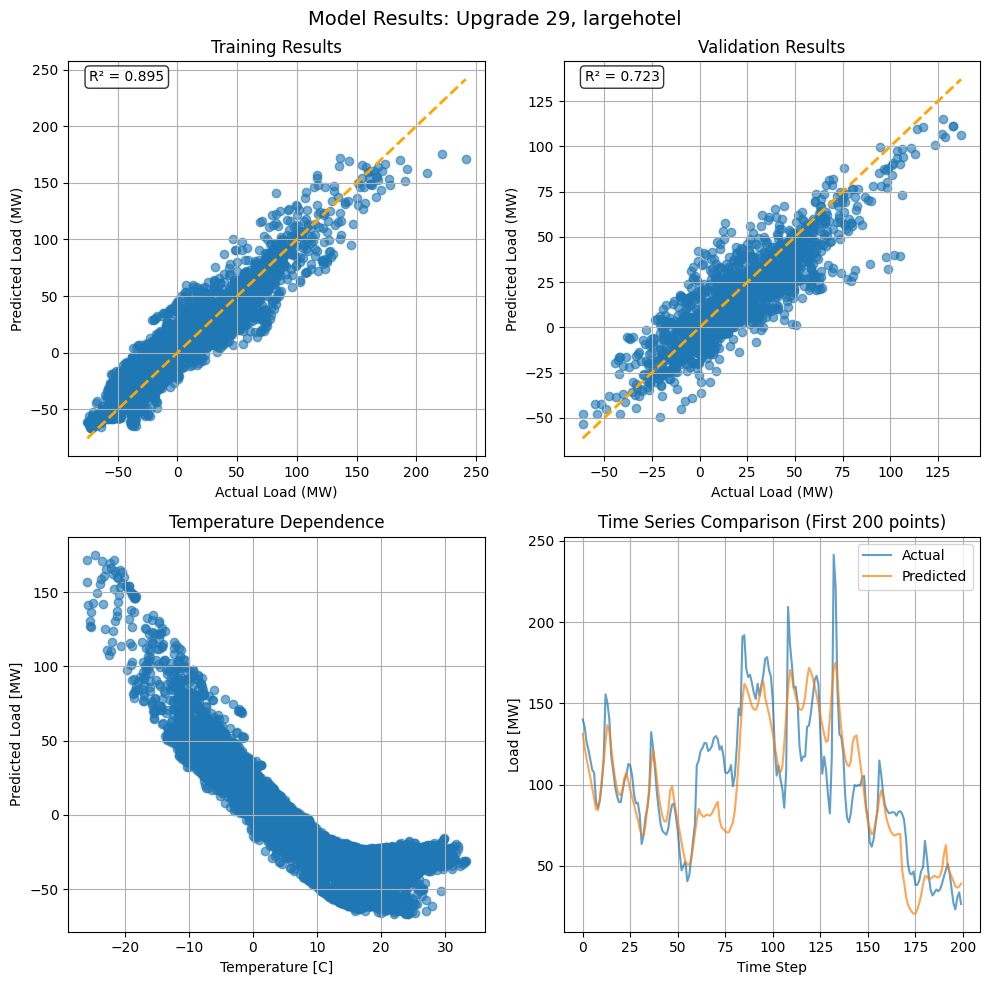


Progress: 5/28
Training model for upgrade 29, building_type smalloffice (8753 samples)
Model trained - R2: 0.754, RMSE: 19.54 MW, Iterations: 131


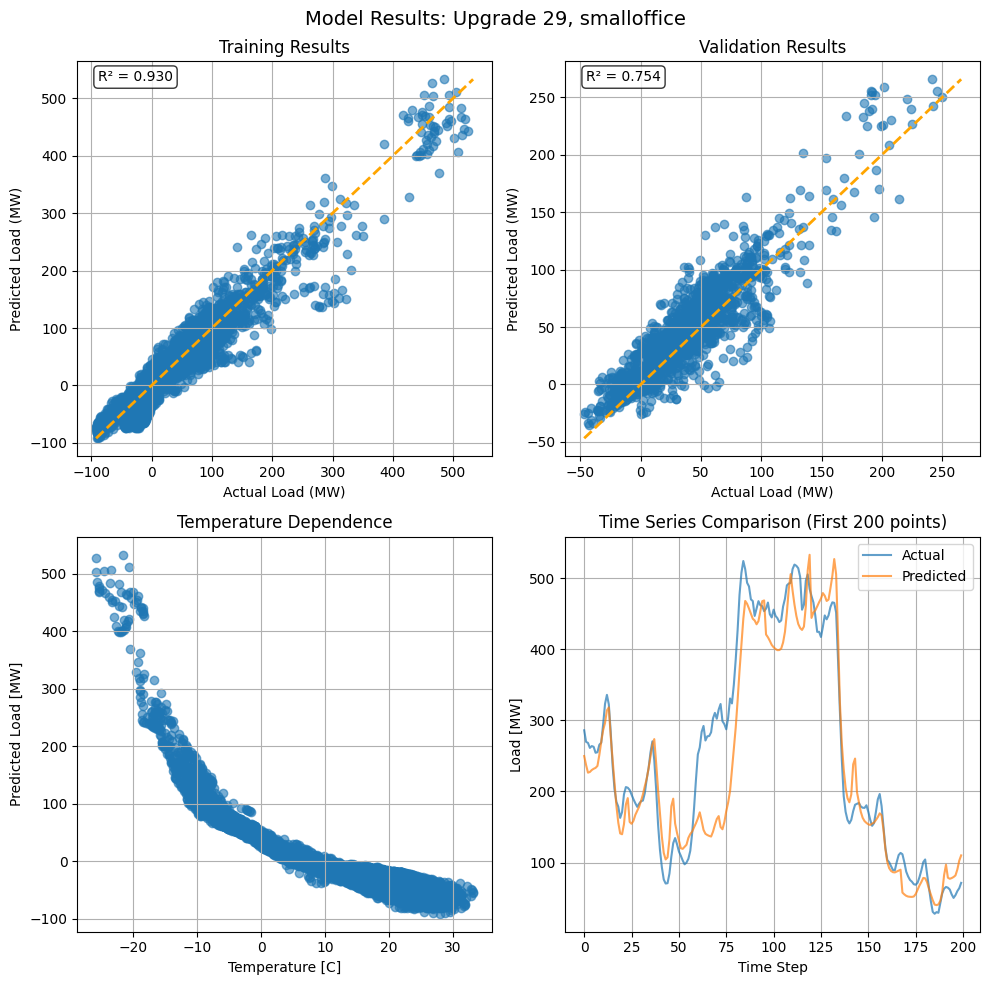


Progress: 6/28
Training model for upgrade 29, building_type retailstandalone (8753 samples)
Model trained - R2: 0.888, RMSE: 27.28 MW, Iterations: 90


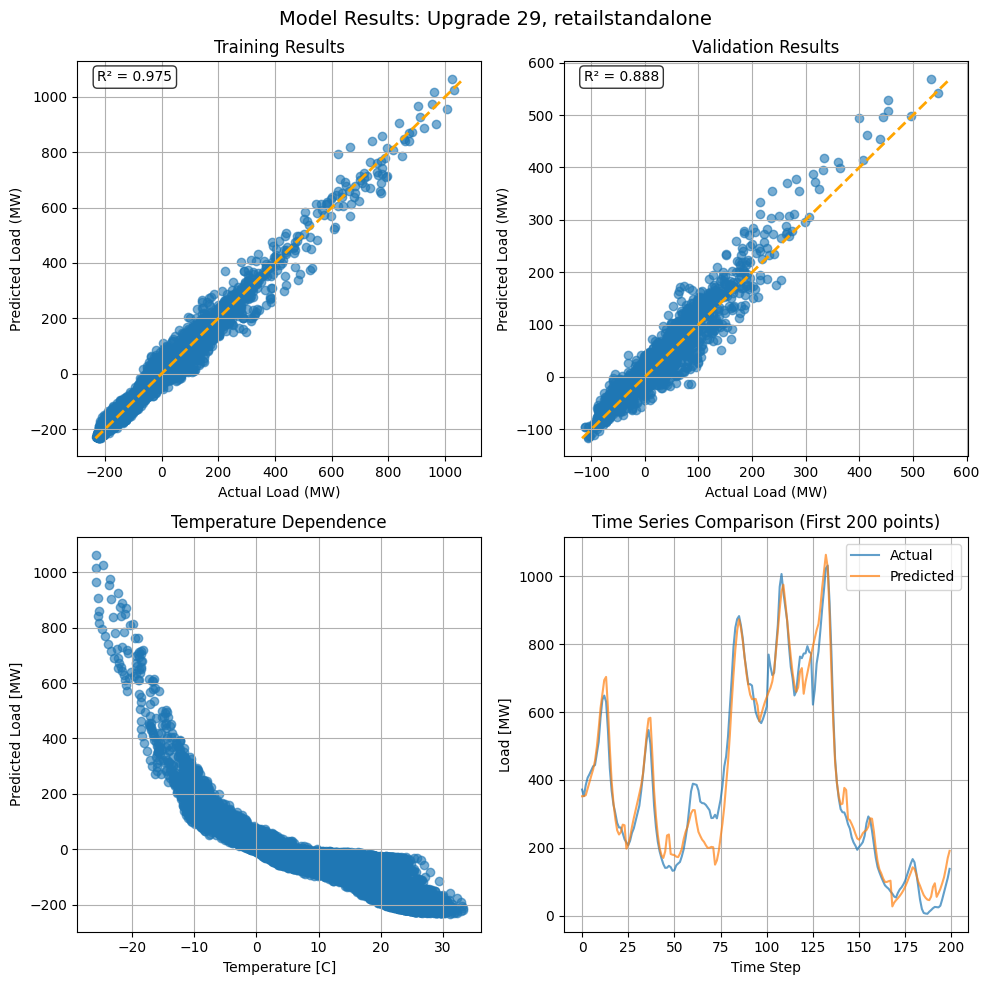


Progress: 7/28
Training model for upgrade 29, building_type warehouse (8753 samples)
Model trained - R2: 0.743, RMSE: 29.55 MW, Iterations: 90


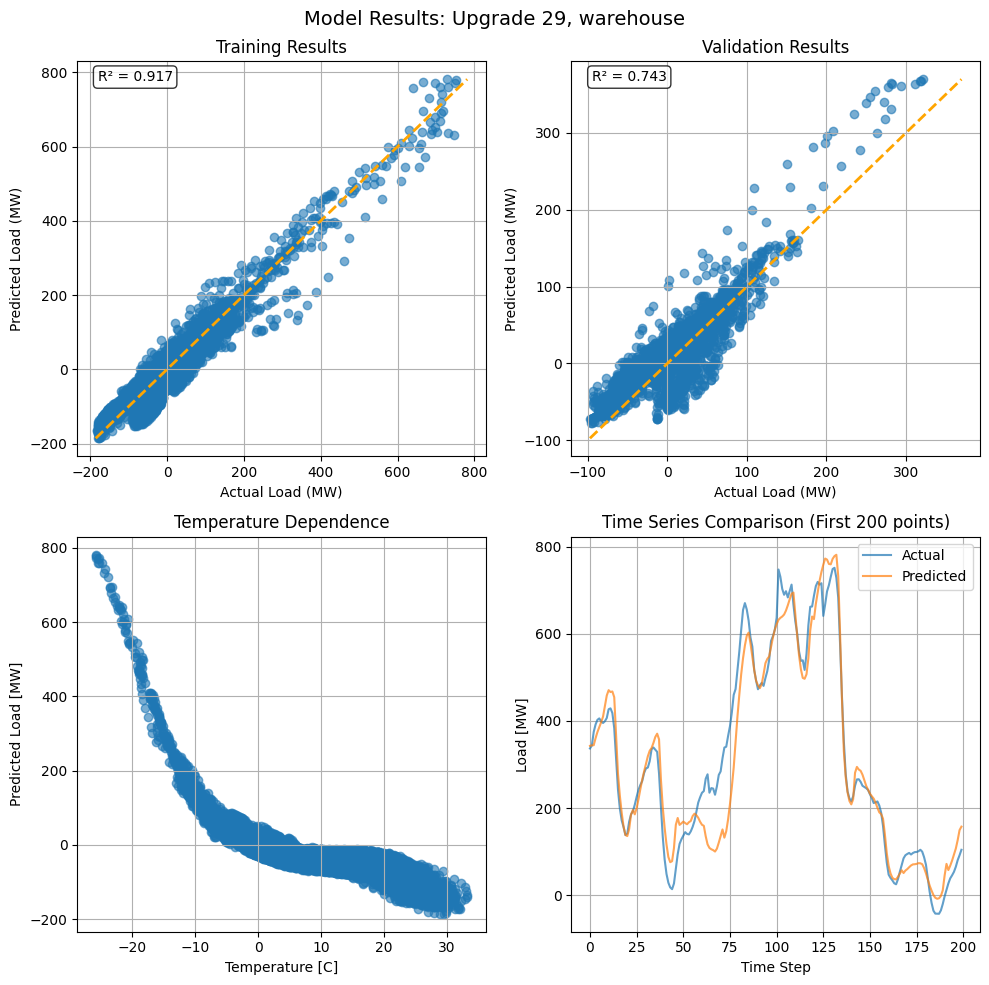


Progress: 8/28
Training model for upgrade 29, building_type secondaryschool (8753 samples)
Model trained - R2: 0.847, RMSE: 71.11 MW, Iterations: 115


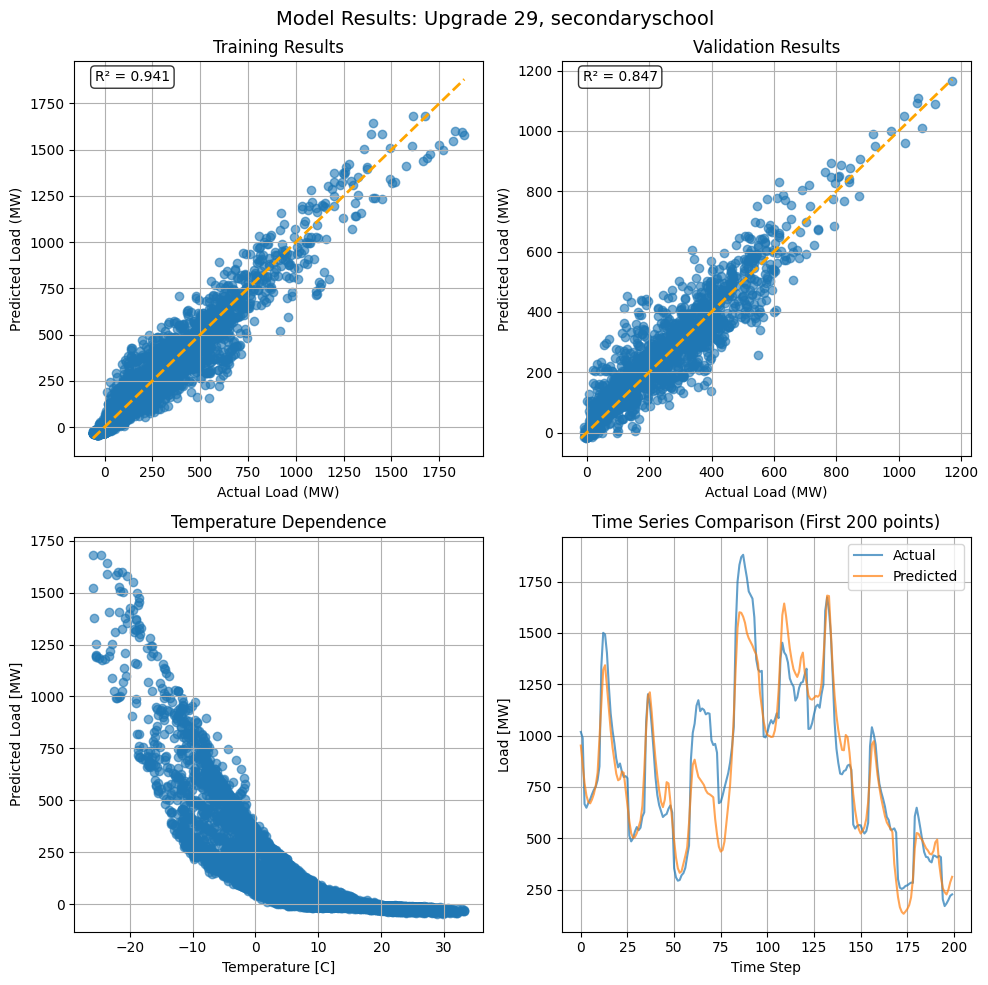


Progress: 9/28
Training model for upgrade 29, building_type retailstripmall (8753 samples)
Model trained - R2: 0.875, RMSE: 58.00 MW, Iterations: 90


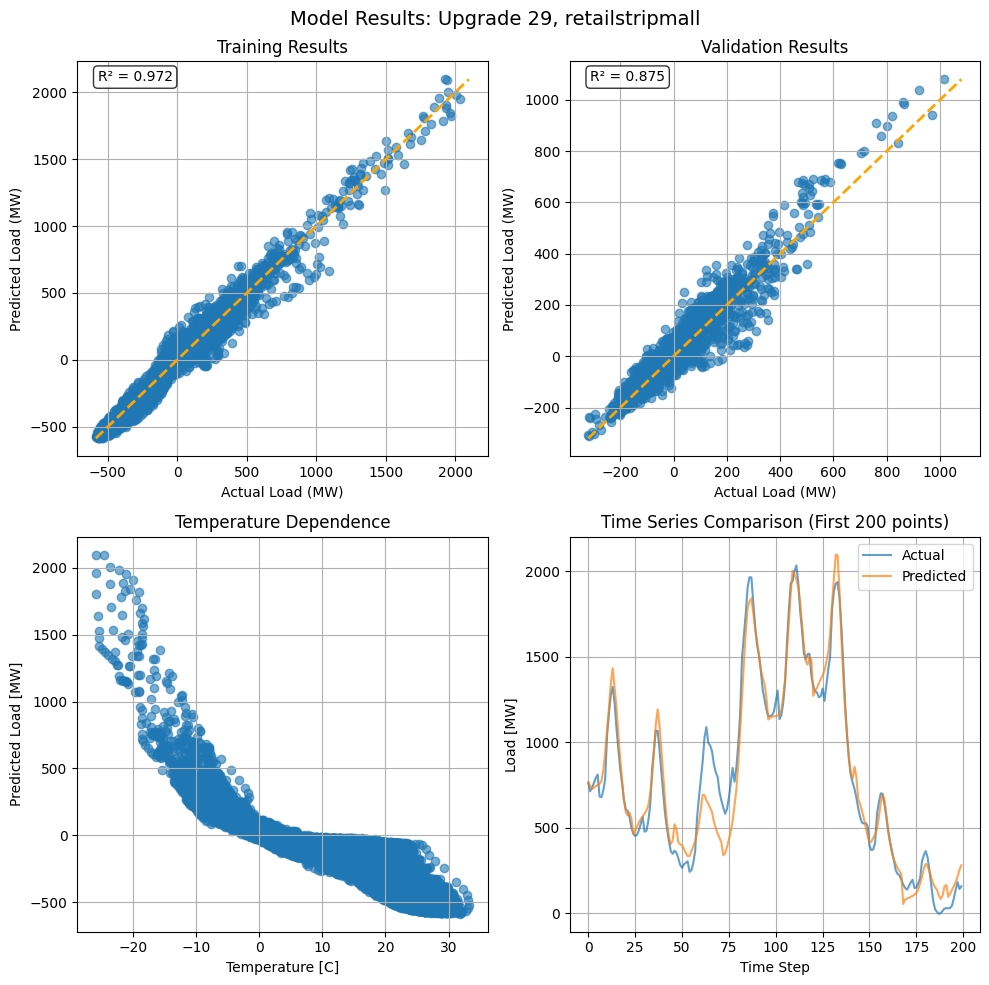


Progress: 10/28
Training model for upgrade 29, building_type smallhotel (8753 samples)
Model trained - R2: 0.808, RMSE: 0.51 MW, Iterations: 87


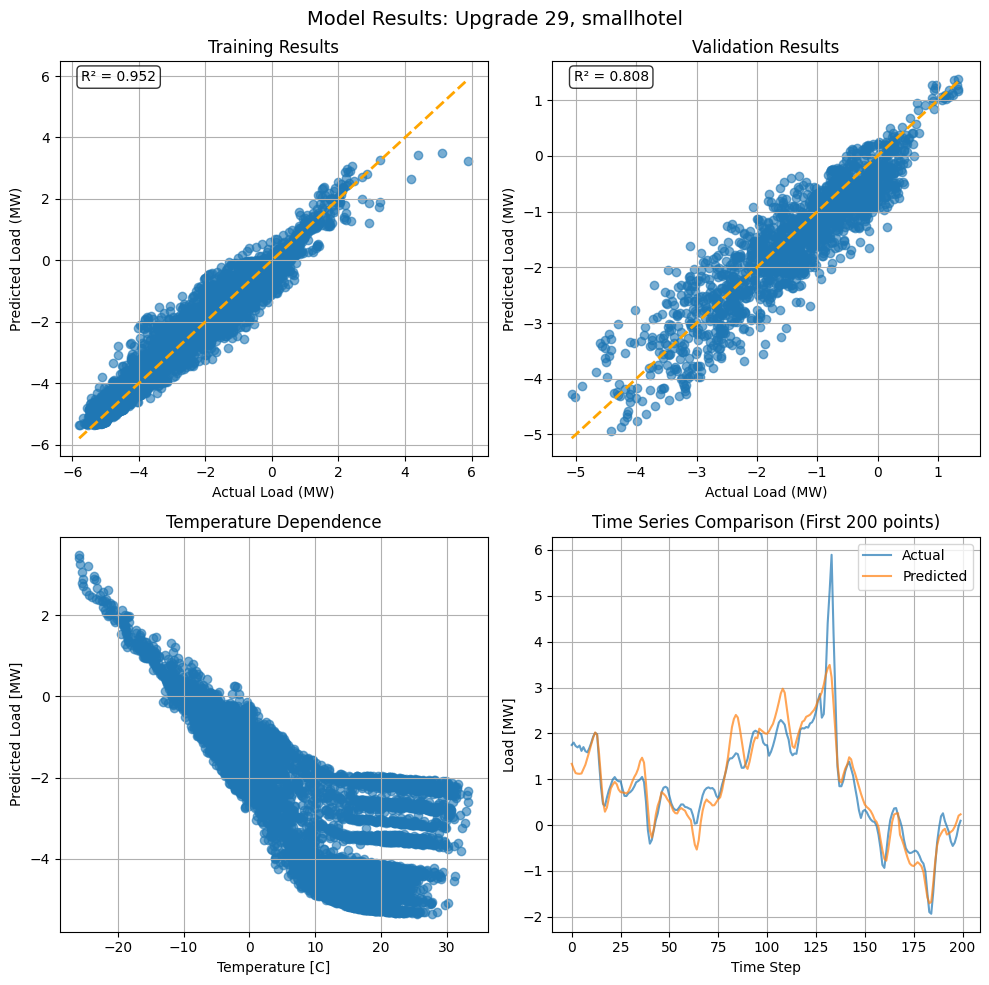


Progress: 11/28
Training model for upgrade 29, building_type primaryschool (8753 samples)
Model trained - R2: 0.783, RMSE: 50.72 MW, Iterations: 115


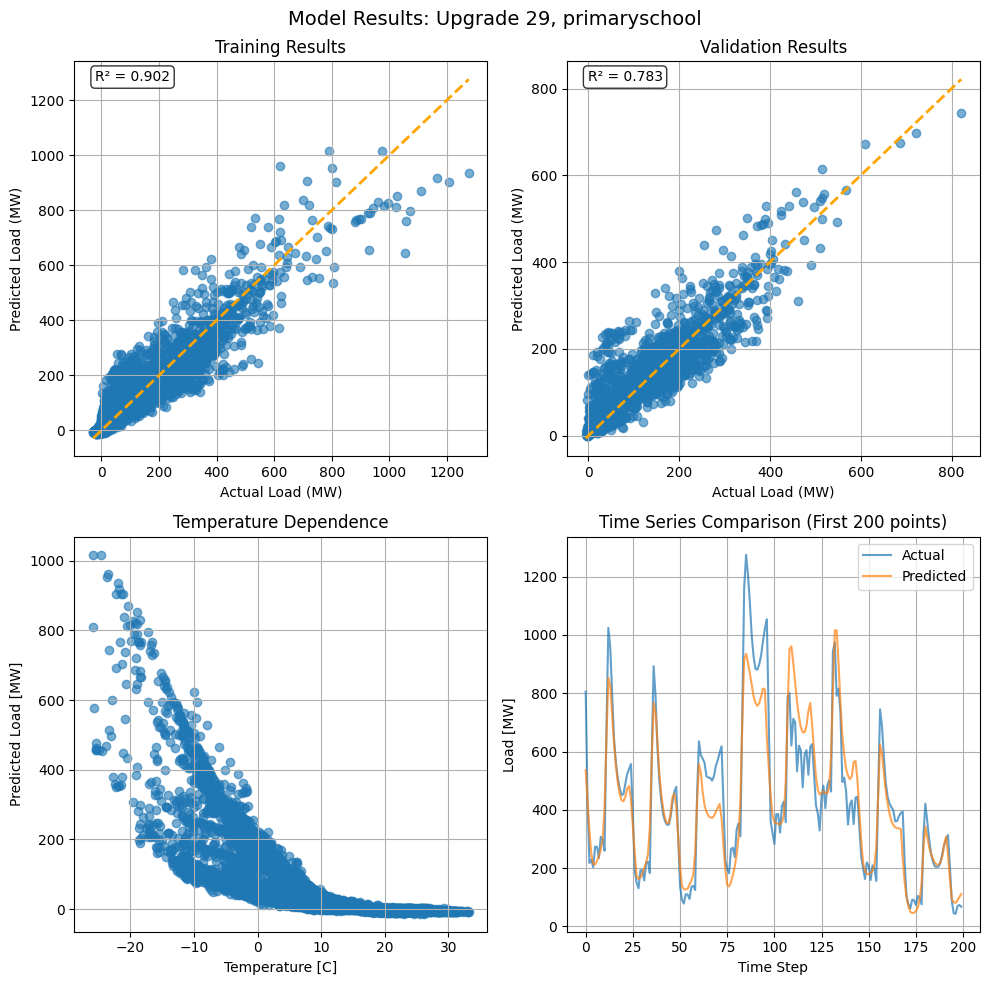


Progress: 12/28
Training model for upgrade 29, building_type quickservicerestaurant (8753 samples)
Model trained - R2: 0.868, RMSE: 1.71 MW, Iterations: 63


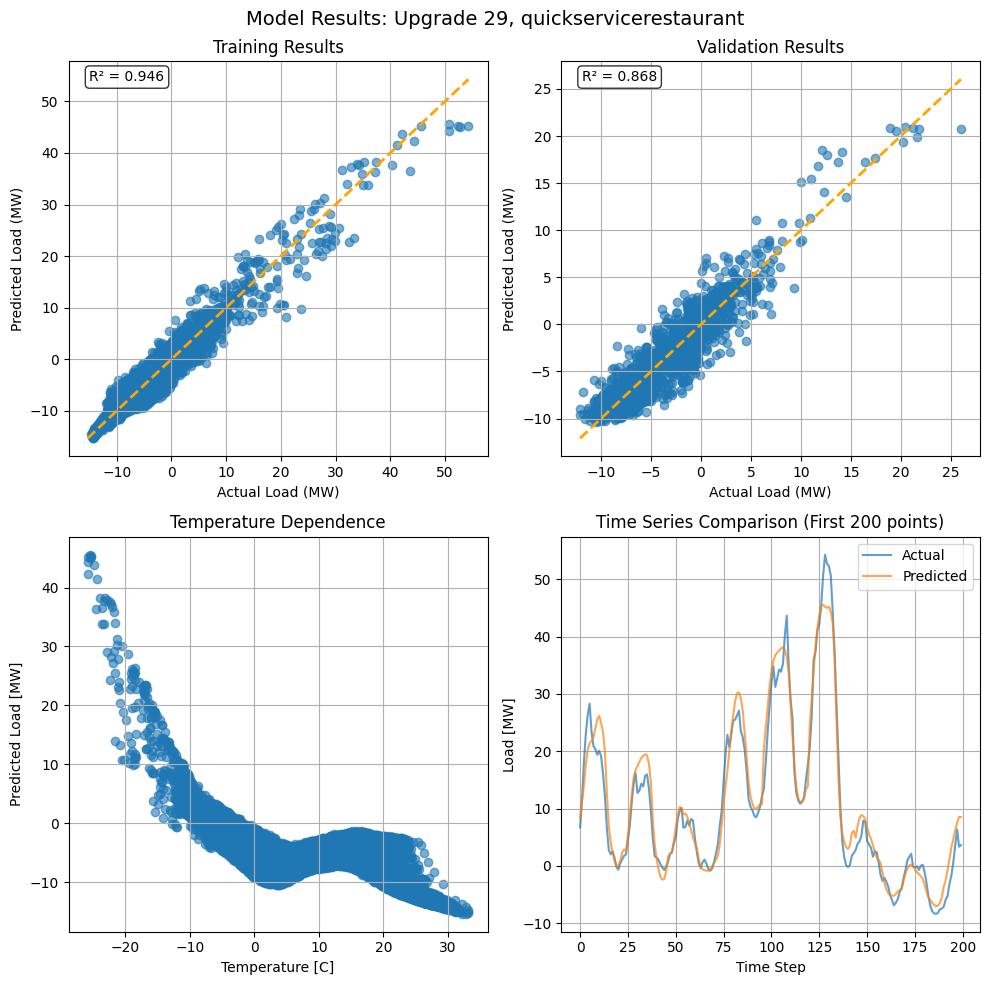


Progress: 13/28
Training model for upgrade 29, building_type mediumoffice (8753 samples)
Model trained - R2: 0.714, RMSE: 17.79 MW, Iterations: 115


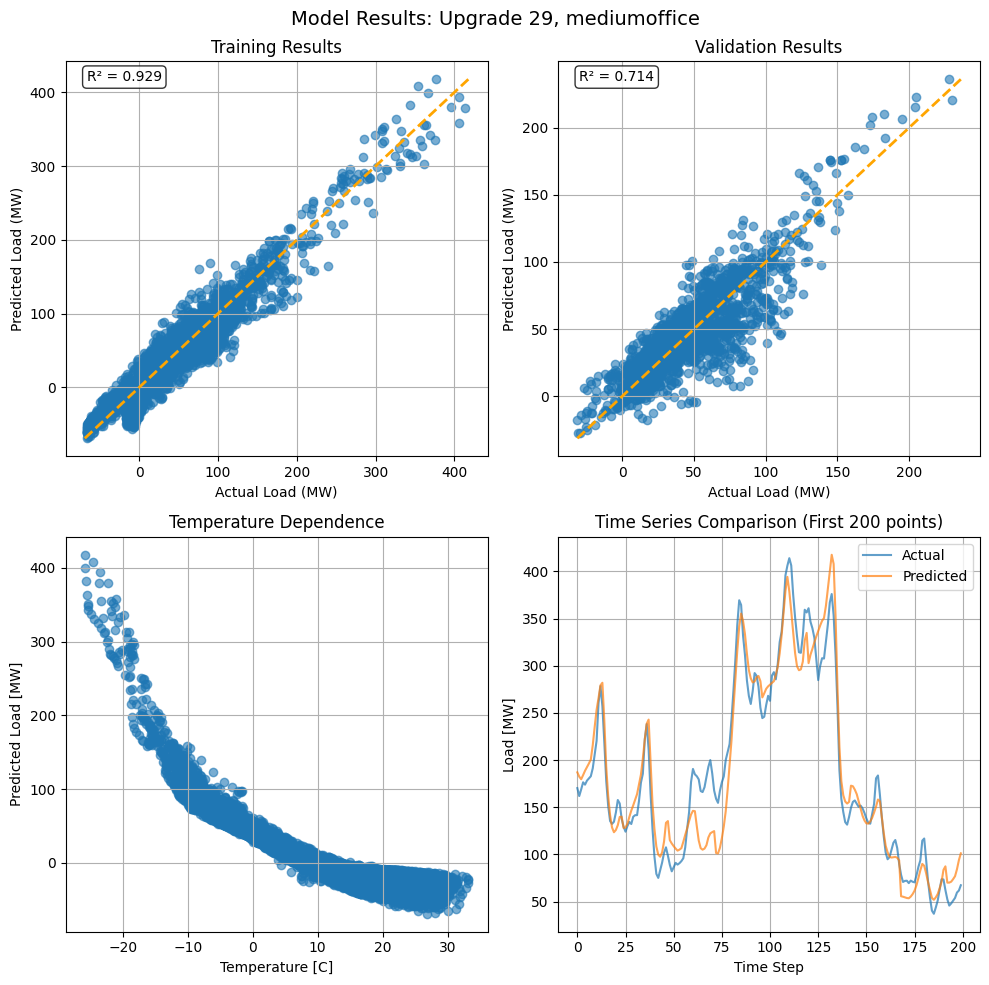


Progress: 14/28
Training model for upgrade 29, building_type fullservicerestaurant (8753 samples)
Model trained - R2: 0.901, RMSE: 14.54 MW, Iterations: 122


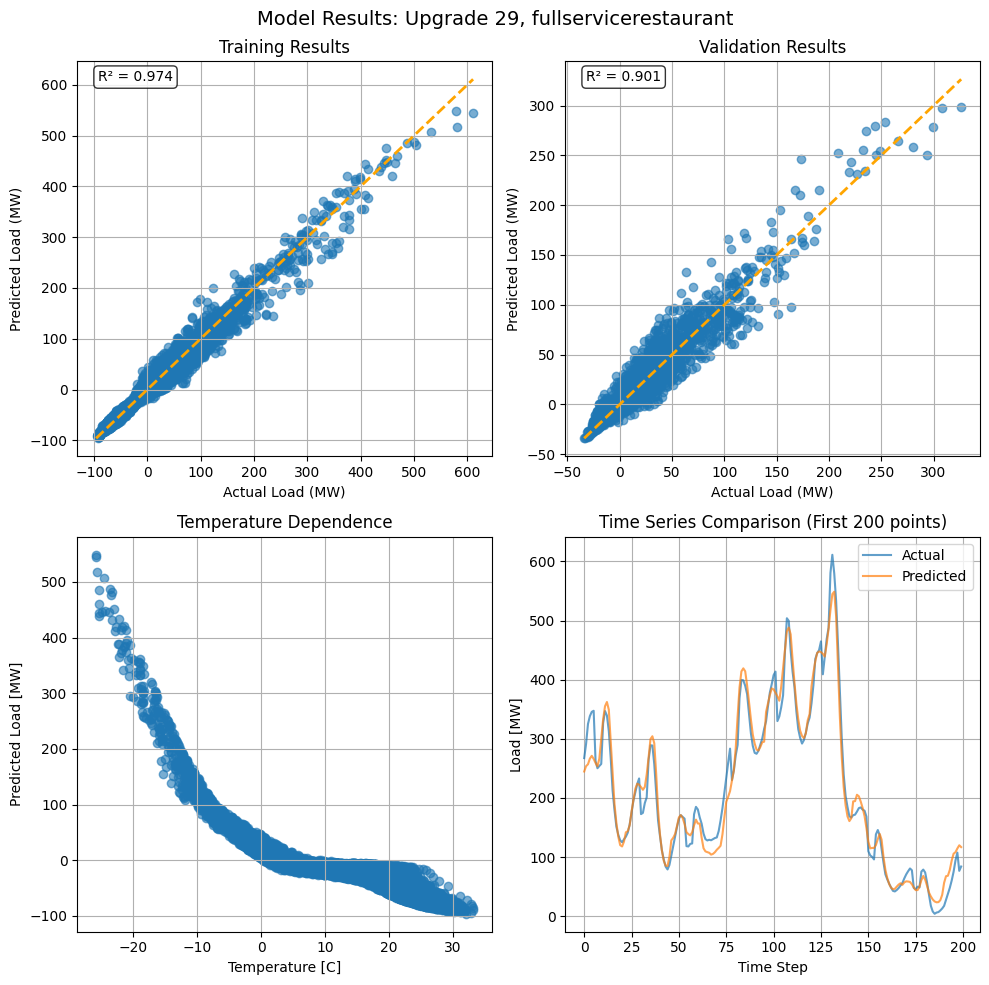


Progress: 15/28
Training model for upgrade 31, building_type outpatient (8753 samples)
Model trained - R2: 0.805, RMSE: 8.46 MW, Iterations: 83


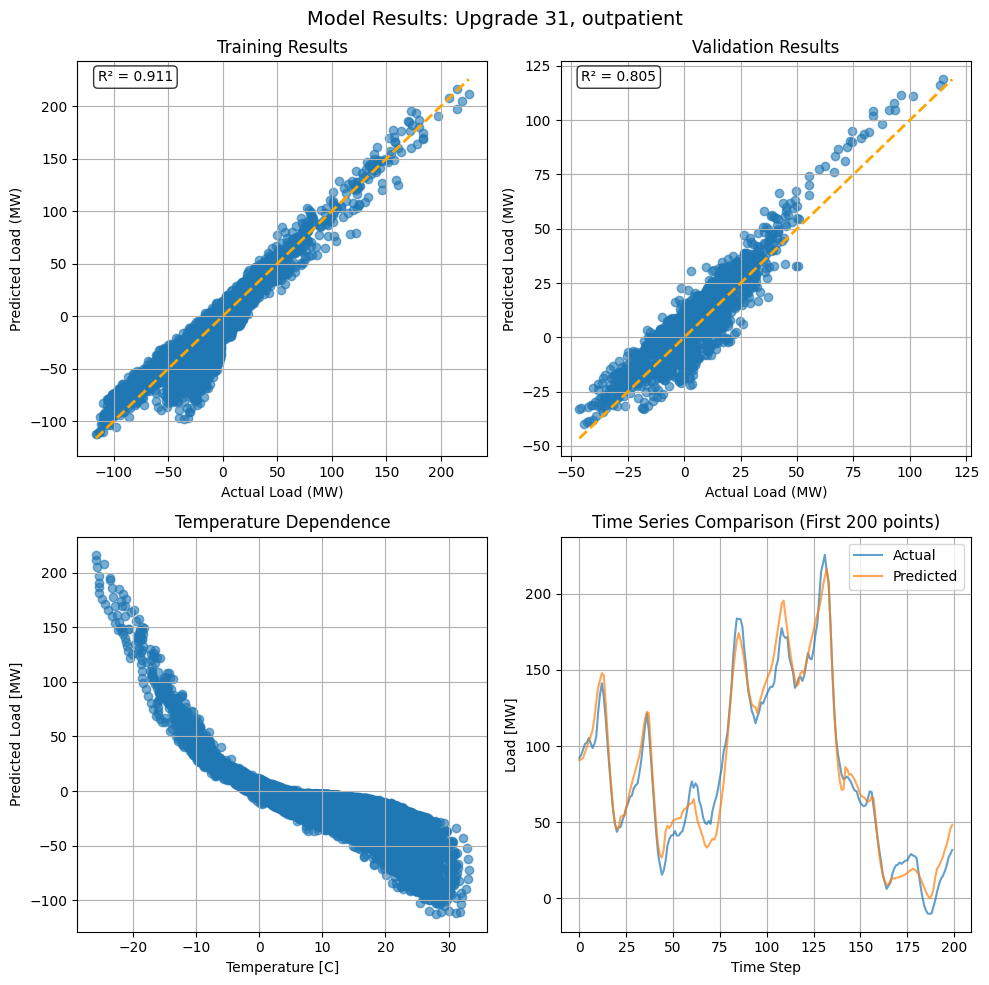


Progress: 16/28
Training model for upgrade 31, building_type hospital (8753 samples)
Model trained - R2: 0.887, RMSE: 7.96 MW, Iterations: 71


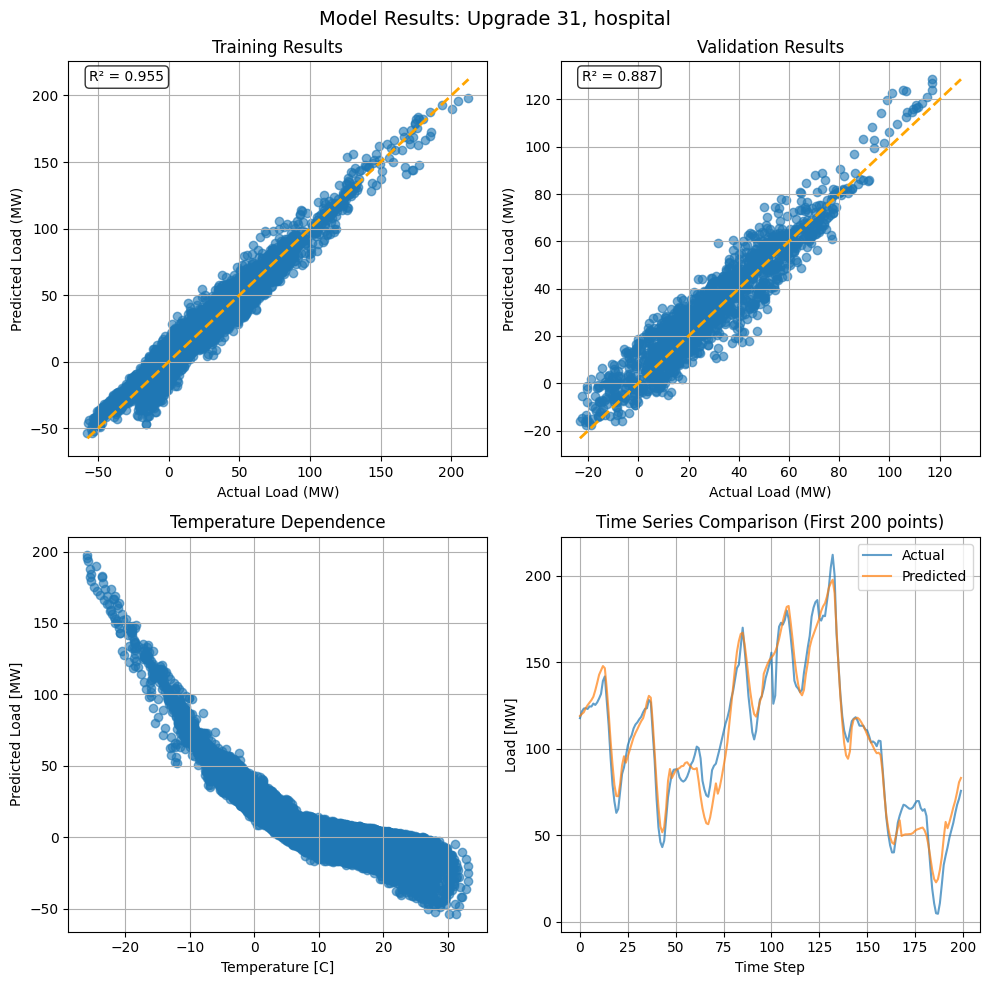


Progress: 17/28
Training model for upgrade 31, building_type largeoffice (8753 samples)
Model trained - R2: 0.365, RMSE: 44.24 MW, Iterations: 70


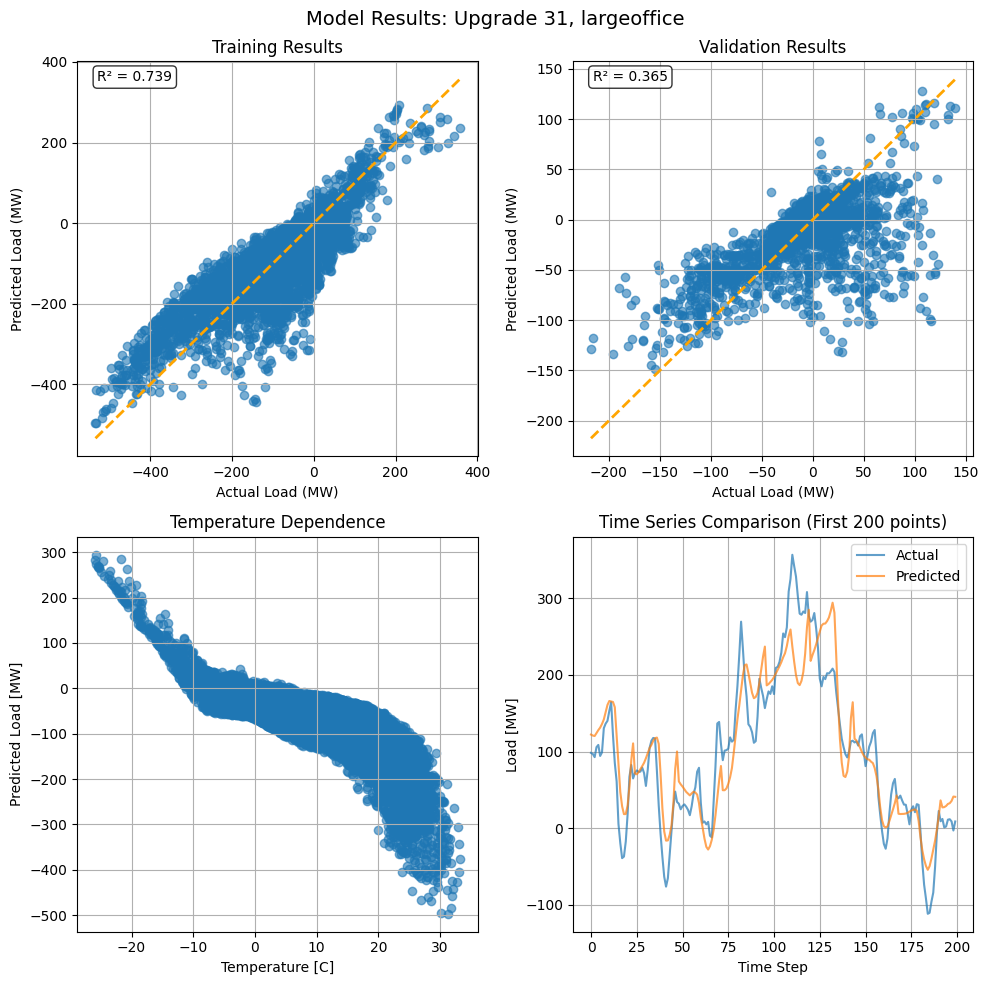


Progress: 18/28
Training model for upgrade 31, building_type largehotel (8753 samples)
Model trained - R2: 0.363, RMSE: 7.97 MW, Iterations: 93


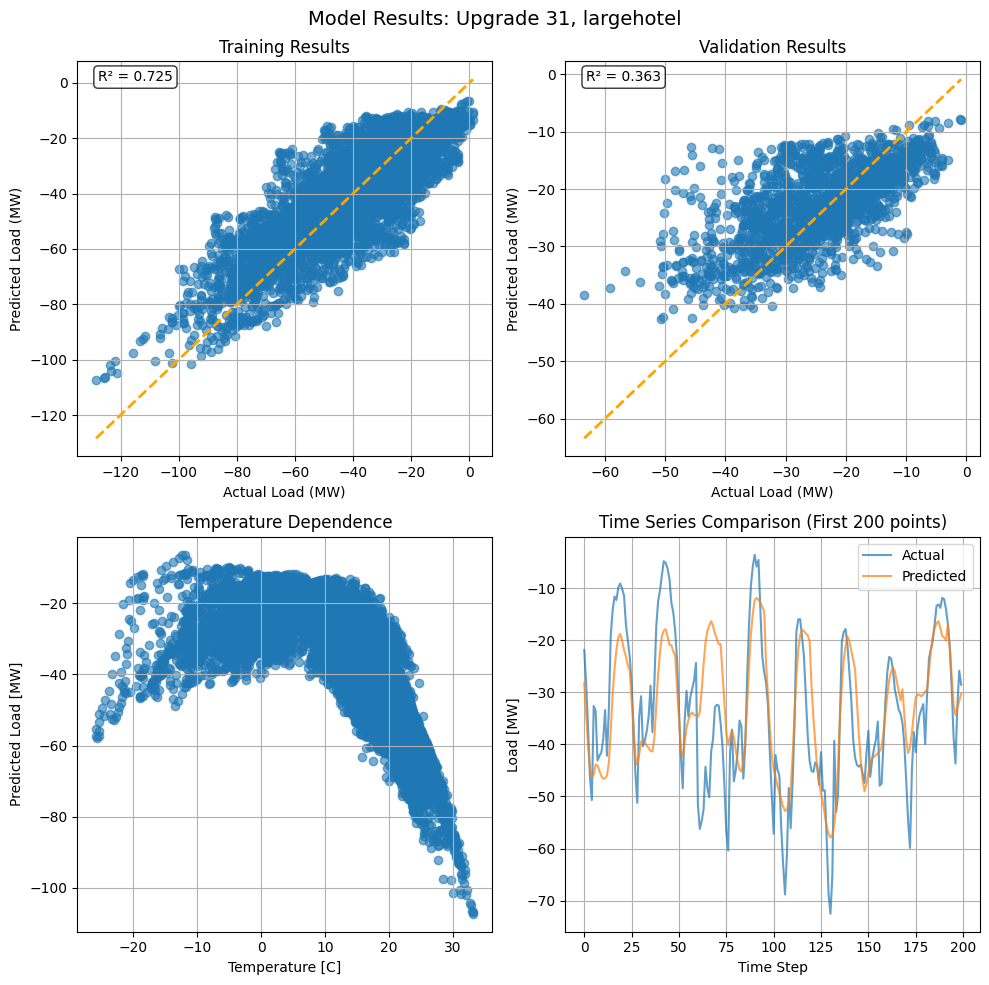


Progress: 19/28
Training model for upgrade 31, building_type smalloffice (8753 samples)
Model trained - R2: 0.357, RMSE: 18.92 MW, Iterations: 159


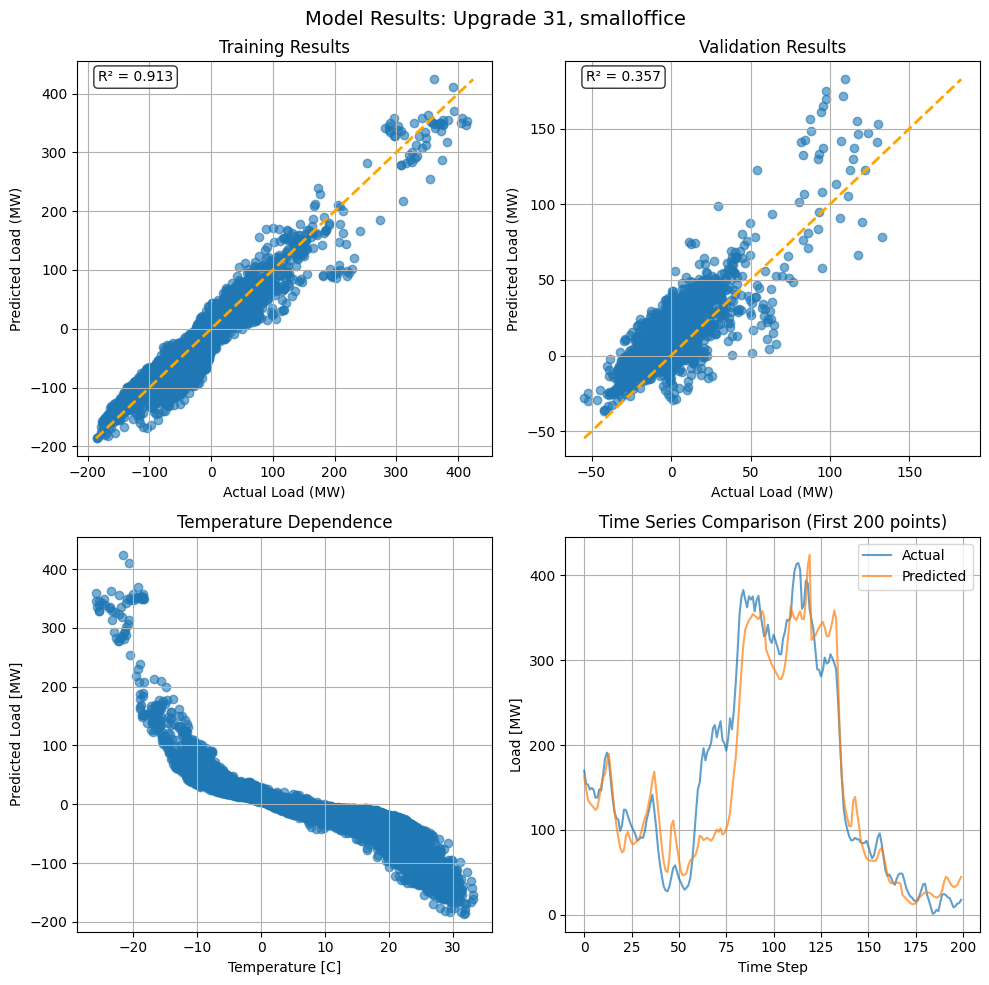


Progress: 20/28
Training model for upgrade 31, building_type retailstandalone (8753 samples)
Model trained - R2: 0.853, RMSE: 21.33 MW, Iterations: 75


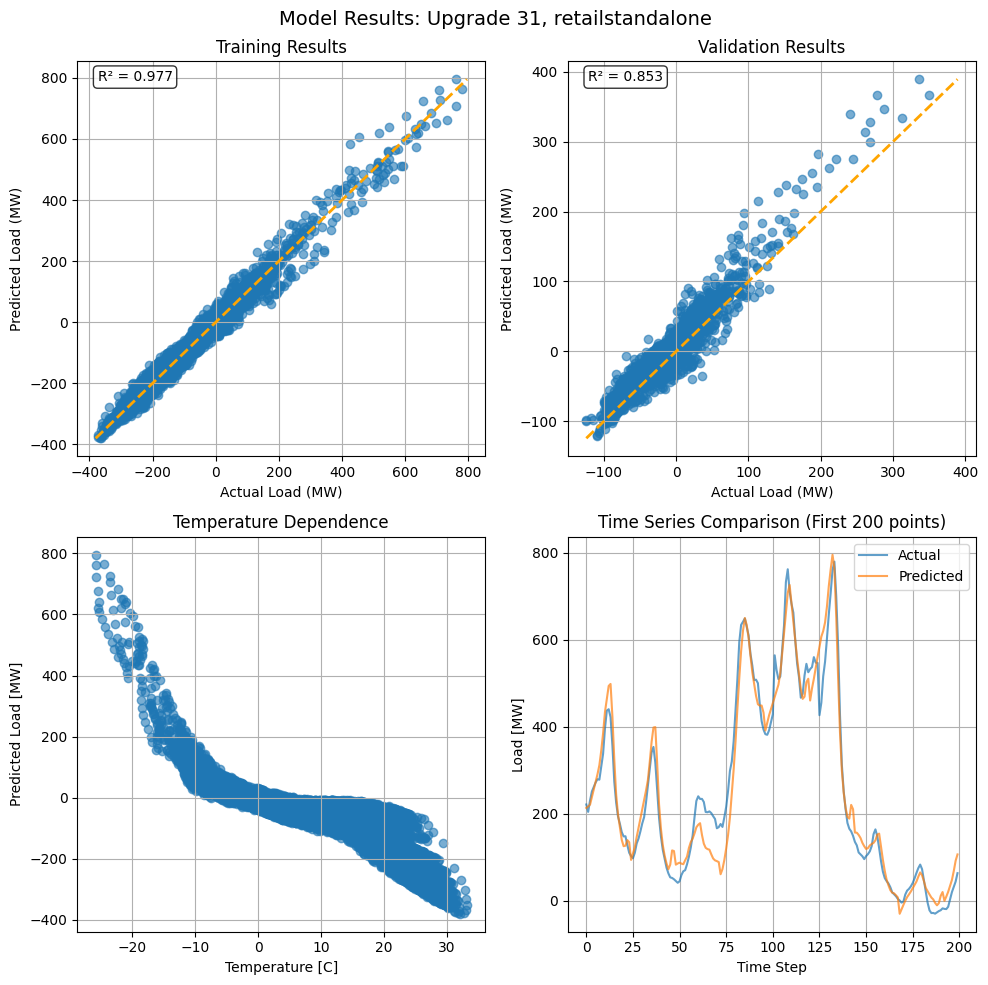


Progress: 21/28
Training model for upgrade 31, building_type warehouse (8753 samples)
Model trained - R2: 0.221, RMSE: 26.79 MW, Iterations: 136


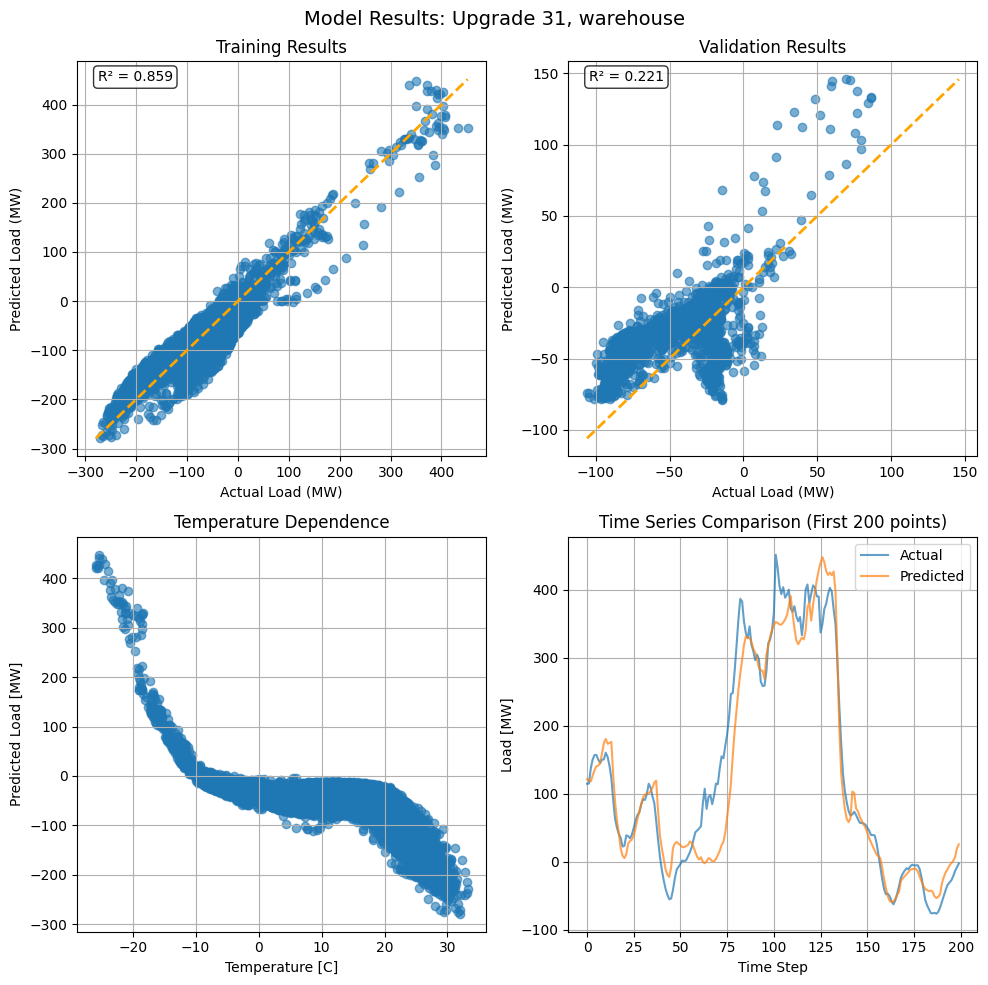


Progress: 22/28
Training model for upgrade 31, building_type secondaryschool (8753 samples)
Model trained - R2: 0.809, RMSE: 72.61 MW, Iterations: 175


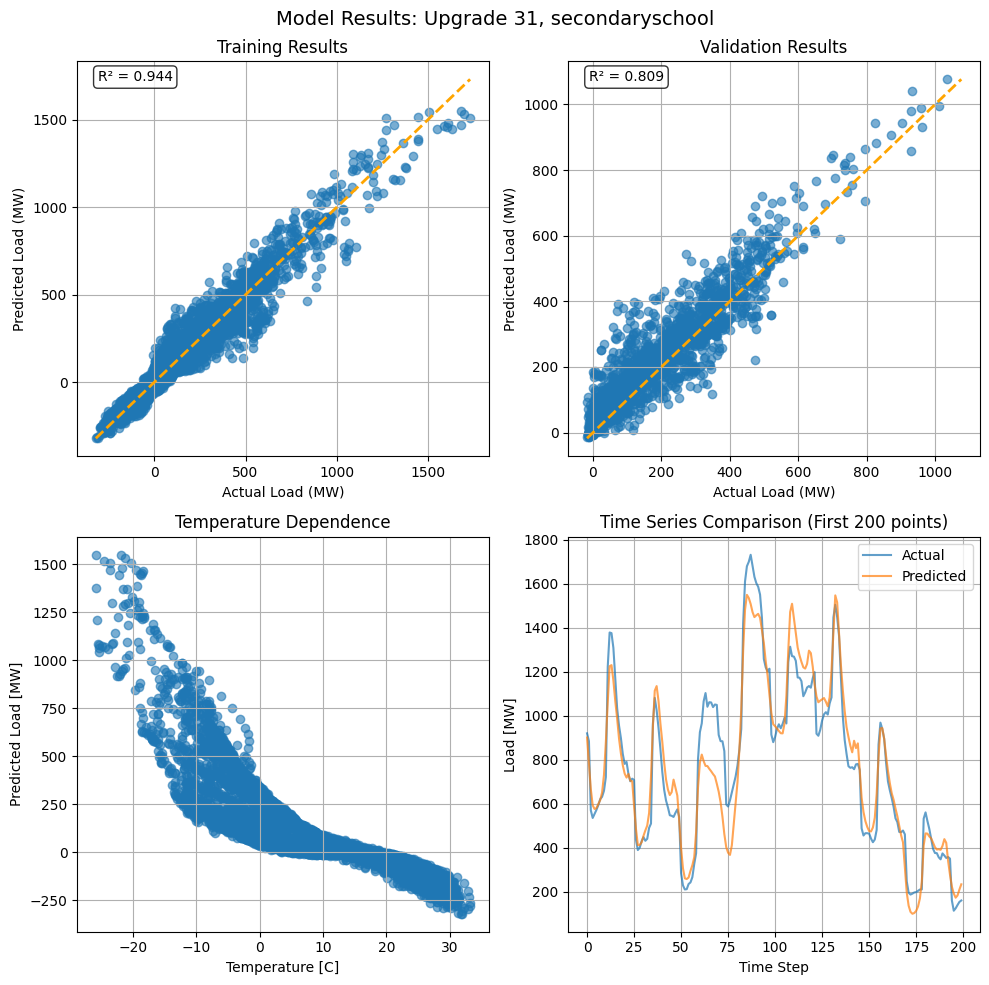


Progress: 23/28
Training model for upgrade 31, building_type retailstripmall (8753 samples)
Model trained - R2: 0.856, RMSE: 43.94 MW, Iterations: 90


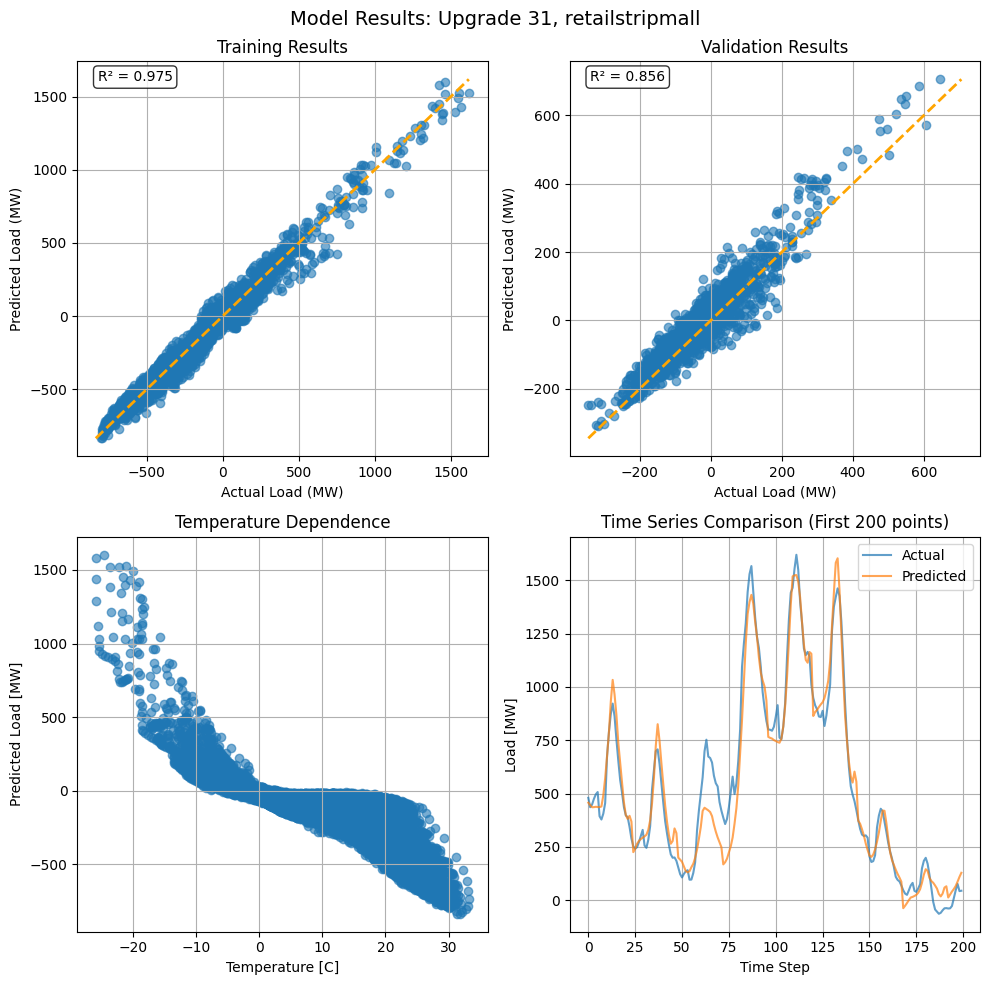


Progress: 24/28
Training model for upgrade 31, building_type smallhotel (8753 samples)


In [ ]:
# Train
predictor = bem.train_load_prediction_models(
    stock_type = stock_type,
    df = df,
    upgrades = [29, 31],
    building_types = bem.building_types_dict[stock_type],
    temperature_col = 'T2C',
    hidden_layer_sizes = (100, 100),
    plot_results = True,
    store_models = True
)

In [ ]:
# Predict future loads
tgw_experiments = np.sort(os.listdir(tgw_path))

# Loop through all TGW experiments
for temp_save_name in tgw_experiments:
    # Climate path
    temp_file_path = f"{project_path}/data/climate/tgw/zonal_T2C_{temp_save_name}.csv"
    # Predict new
    predictor.predict_future_loads(temp_file_path = temp_file_path,
                                   temp_save_name = temp_save_name,
                                   upgrades = [29, 31],
                                   building_types = bem.building_types_dict[stock_type])

In [15]:
# Comparison plots
upgrade = 31
df_hist = pd.concat([pd.read_csv(f"{project_path}/data/load/{stock_type}/simulated/state_wide/historical_1980_2019_{upgrade}_{home_type}.csv") for home_type in bem.building_types])
df_rcp45 = pd.concat([pd.read_csv(f"{project_path}/data/load/{stock_type}/simulated/state_wide/rcp45cooler_2020_2059_{upgrade}_{home_type}.csv") for home_type in bem.building_types])
df_rcp85 = pd.concat([pd.read_csv(f"{project_path}/data/load/{stock_type}/simulated/state_wide/rcp85hotter_2060_2099_{upgrade}_{home_type}.csv") for home_type in bem.building_types])

# Read historical NYISO load
df_load = pd.read_csv(f"{project_path}/data/nyiso/historical_load/combined/historical_load.csv")
df_load["time"] = pd.to_datetime(df_load["time"])
df_load["time"] = df_load["time"].dt.tz_localize("America/New_York", ambiguous="NaT", nonexistent="NaT")
df_load["time"] = df_load["time"].dt.tz_convert("UTC")

In [62]:
# Get historical NYISO load
df_load = pd.read_csv(f"{project_path}/data/nyiso/historical_load/combined/historical_load.csv")
df_load["time"] = pd.to_datetime(df_load["time"])
df_load["time"] = df_load["time"].dt.tz_localize("America/New_York", ambiguous="NaT", nonexistent="NaT")
df_load["time"] = df_load["time"].dt.tz_convert("UTC")

df_load = df_load[df_load['load_MW'] > 0.]
df_load_nyiso = df_load.groupby('time')[['load_MW']].mean().reset_index()
df_load_nyiso['dayofyear'] = df_load_nyiso['time'].dt.dayofyear

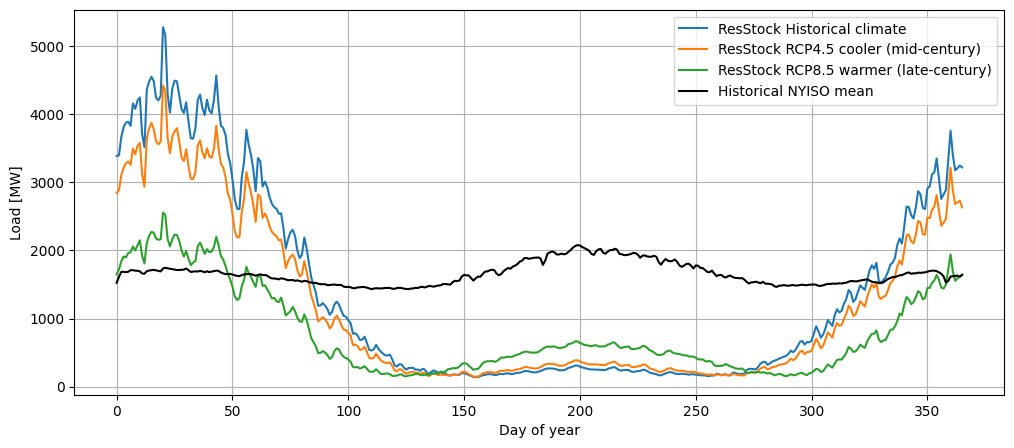

In [69]:
# Plot all
fig, ax = plt.subplots(figsize=(12,5))

# resstock_year = 2012
ax.plot(df_hist.groupby('day_of_year')['predicted_savings_MW'].mean().to_numpy(), label='ResStock Historical climate')
ax.plot(df_rcp45.groupby('day_of_year')['predicted_savings_MW'].mean().to_numpy(), label='ResStock RCP4.5 cooler (mid-century)')
ax.plot(df_rcp85.groupby('day_of_year')['predicted_savings_MW'].mean().to_numpy(), label='ResStock RCP8.5 warmer (late-century)')

ax.plot(df_load_nyiso.groupby('dayofyear').mean()['load_MW'].to_numpy(), color='black', label='Historical NYISO mean')

ax.legend()
ax.set_ylabel('Load [MW]')
ax.set_xlabel('Day of year')
ax.grid(0.5)
plt.show()

### Distribute to bus level

In [3]:
import importlib
importlib.reload(elm)

<module 'python.elec_load_model' from '/home/fs01/dcl257/projects/acorn-julia/src/python/elec_load_model.py'>

In [8]:
# Loop through all, assign to bus
tgw_experiments = np.sort(os.listdir(tgw_path))

stock_type = 'resstock'
upgrade = '1'

for home_type in bem.home_types:
    for experiment in tgw_experiments:
        # Check if done
        save_path = f'{project_path}/data/load/{stock_type}/simulated/bus_level/{experiment}_{upgrade}_{home_type}.parquet'
        if os.path.exists(save_path):
            contine
        # Compute
        df = bem.assign_loads_to_bus(
            stock_type = stock_type,
            building_type = home_type,
            upgrade = upgrade,
            climate_scenario = experiment
        )
        df.to_parquet(save_path)